<a href="https://colab.research.google.com/github/Bookas1468/data-science-google-colab/blob/main/projects%5CLukaCookU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 3 Project: The Right Likelihood for the Job

In unit 2, we asked "what's the true proportion of ____?"

In this unit's project, we'll ask "What's the true average of \_\_\_\_?" or "What's the true amount of animals that die at the austin animal center?"

**Task**:

Two parts:

1. Propose a data set that's compatible with a single variable likelihood from pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one prior, and NONE of your priors can be a beta distribtuion
- Your likelihood CANNOT be a Bernoulli distribution nor a Binomial distribution.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The chemshift data anlysis portion of the Unit3NotesAK is your example. You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- A posterior predictive check is more important than the posterior for this project. Ask me if you want to know why.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.


In [ ]:
!pip install preliz'
!pip install arviz
!pip install pymc
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.5/535.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.6 MB/s eta 0:00:00
  Created wheel for logical-unification: filename=logical_unification-0.4.6-py3-none-any.whl size=14007 sha256=ccab95ead8525b2120f5475af8389f260197935f86b17647ec41e99592ce64d6
  Stored in directory: /root/.cache/pip/wheels/4b/07/cf/3fdaedafc40d7b1861c98be0df1bf3b2b3e87e03187fa95298
Successfully built logical-unification


This is the data beater. It beats the data into a pretty dictionary for human viewing and an array for number crunching. The number is the death rate of the breed as a percentage, so 2.4 = 2.4%. The mean is 2.822112955522865%.
This data is from the Austin Animal Center, so it's probably very accurate, and I've extracted the breed name and the end result, then totaled them up. Below is a histogram to see roughly where all the numbers are.

In [ ]:
import csv

with open('aacdata.csv', mode='r', newline='') as file:
    csv_reader = csv.reader(file)

    header = next(csv_reader)
    ones = 0
    zeroes = 0
    deaddict = {

    }
    livedict = {

    }
    ac_data = []
    for row in csv_reader:
        if row[2]=='Died' or row[2]=='Euthanasia' or row[2]=='Disposal':
            deaddict.update({row[7]:deaddict.get(row[7],0)+1})
        else:
            livedict.update({row[7]:livedict.get(row[7],0)+1})
    for i in livedict:
      if livedict.get(i,0) + deaddict.get(i,0) > 102 and deaddict.get(i,0)/(livedict.get(i,0) + deaddict.get(i,0))*100<10:
          ac_data.append(deaddict.get(i,0)/(livedict.get(i,0) + deaddict.get(i,0))*100)
          print(i,(deaddict.get(i,0)/(livedict.get(i,0) + deaddict.get(i,0)))*100)
    print(ac_data)
    print(np.average(ac_data))

Domestic Shorthair Mix 5.473133758336026
Labrador Retriever Mix 2.2809804811620515
Catahoula Mix 2.112676056338028
Dachshund Mix 2.2670025188916876
Pit Bull Mix 5.447739139001084
Siamese Mix 5.627118644067797
Boxer Mix 2.9535864978902953
Border Collie Mix 1.9130434782608694
Queensland Heeler Mix 2.631578947368421
Chihuahua Shorthair Mix 3.164739884393063
Shih Tzu Mix 2.745995423340961
Rat Terrier Mix 2.6027397260273974
Plott Hound Mix 1.2072434607645874
Miniature Pinscher Mix 1.639344262295082
Carolina Dog Mix 4.918032786885246
American Bulldog Mix 3.431372549019608
Domestic Longhair Mix 7.1132187314759925
Jack Russell Terrier Mix 1.7991004497751124
Miniature Poodle Mix 2.478448275862069
Domestic Medium Hair Mix 6.15931299970388
Rottweiler Mix 6.0546875
Cocker Spaniel Mix 3.7267080745341614
Miniature Schnauzer Mix 2.3494860499265786
Siberian Husky Mix 3.374233128834356
German Shepherd Mix 2.31926967678263
Rhod Ridgeback Mix 0.0
Chihuahua Shorthair 3.3349925335988053
Chihuahua Longhair 

(array([16., 24., 26., 21., 18.,  8., 11.,  6.,  2.,  2.]),
 array([0.        , 0.82278481, 1.64556962, 2.46835443, 3.29113924,
        4.11392405, 4.93670886, 5.75949367, 6.58227848, 7.40506329,
        8.2278481 ]),
 <BarContainer object of 10 artists>)

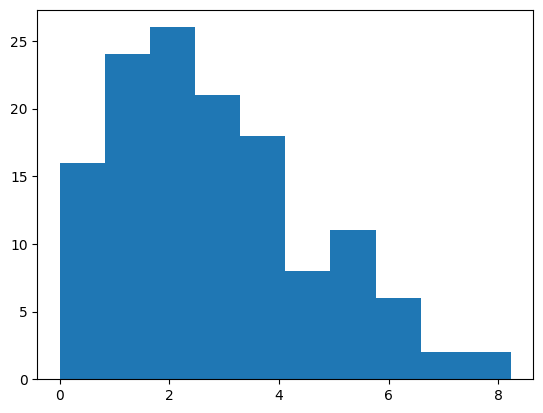

In [ ]:
plt.hist(ac_data)


model:
this model uses a chisquared as the prior since it looks kinda similar
see the chisquared graph below
i used a poisson because I wanted a discrete example and it kinda looked like my data since it has a similar shape and it starts at 0.

<Axes: >

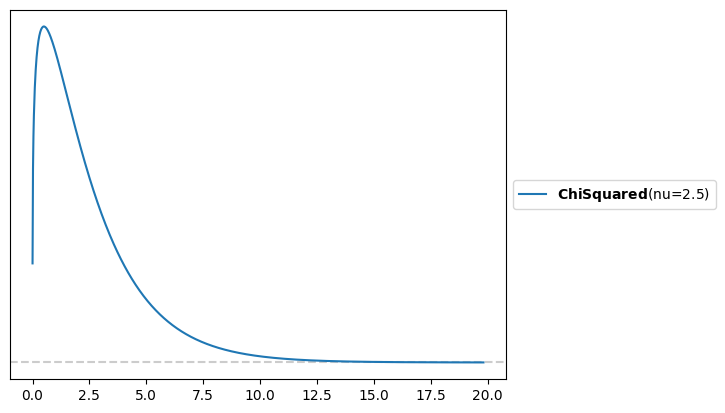

In [ ]:
pz.ChiSquared(2.5).plot_pdf()

In [ ]:
with pm.Model() as model_acPoisson:
    μ =pm.ChiSquared(name='prior',nu=2.5)
    Y = pm.Poisson('Y',mu=μ,observed=ac_data)
    idata_acPoisson = pm.sample()

this doohikey generates a posterior predictive, where it simulates using the model and compares it to the observed data.

This model isn't super accurate , but it generally follows the same shape. I could make it more accurate if I had a better prior, but I don't know how I would generate that.

The poisson is a pretty good model since the events are random and independant.

In [ ]:
pm.sample_posterior_predictive(idata_acPoisson, model=model_acPoisson, extend_inferencedata=True)

<Axes: xlabel='Y'>

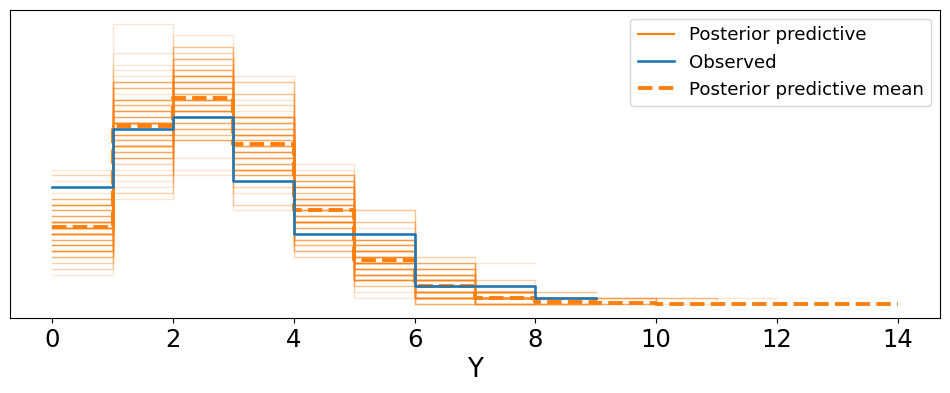

In [ ]:
az.plot_ppc(idata_acPoisson, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

2nd model:
this is my second model. it uses a gamma and half normal to generate a moyal distribution. I don't know why I chose a moyal distribution, but it worked so 👍

A gamma works for the location because it estimates the amount of time to get a number of events. However, i just used mu and sigma so instead it just makes a shape that looks like the data and works good. I used a half normal for the sigma because I needed a distribution that is weighted towards 0 but doesnt go negative. A moyal works because it looks like the data and I can't find what it actually estimates.

In [ ]:
with pm.Model() as model_acGamma:
    μ = pm.Gamma('μ', mu=2.8,sigma=2)
    σ = pm.HalfNormal('σ',sigma=3)
    Y = pm.Moyal('Y', mu = μ, sigma = σ,observed=ac_data)
    idata_acGamma = pm.sample()

In [ ]:
pm.sample_posterior_predictive(idata_acGamma, model=model_acGamma, extend_inferencedata=True)

this is the posterior predictive for the model

it's pretty close, the mean and the observed are very similar save for a few areas where the observed had a significant bump. There is a lot of variance though, so it could be better. Using something other than a gamma migth help.
It appears to be pretty accurate since the means are similar and the general shape is more or less the same.

<Axes: xlabel='Y'>

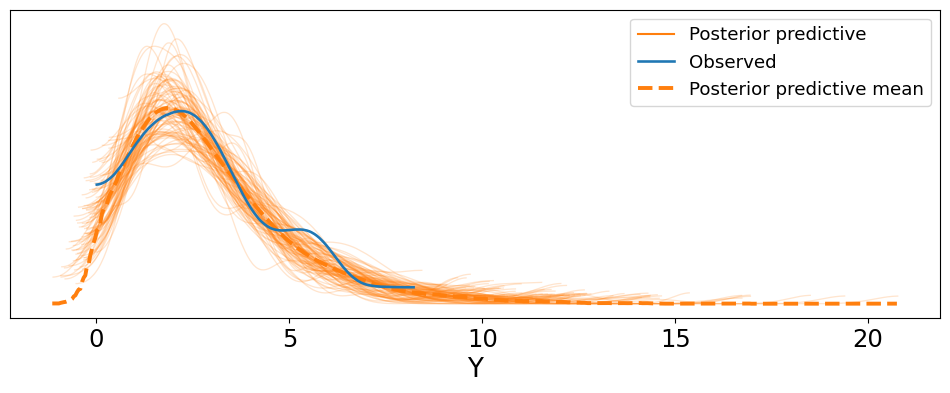

In [ ]:
az.plot_ppc(idata_acGamma, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

conclusion:
it worked pretty good, I don't really understand why it worked but I think I got it in the end. My predictions where pretty close, but still had room for improvement. My data was good though.